In [1]:
import re
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import datetime
import base

In [36]:
#读取开店时间数据
shop_open_dates = base.ReadShopOpenDateCSV();
#读取休假表
calenders = base.ReadCalendarCSV();
###读取商家信息
shop_infos = base.ReadShopInfoCSV();

In [3]:
#（69674110,3）
user_pay_df = pd.read_csv("./data/dataset/dataset/user_pay.txt",
                         encoding='UTF-8',header=None,
                        names=['user_id','shop_id','date'], parse_dates=[2])


In [4]:
#user_pay_df[(user_pay_df['shop_id'] == 1)].groupby('user_id').count().sort_values('shop_id')

In [5]:
#user_pay_df[(user_pay_df['shop_id'] == 1) & (user_pay_df['user_id'] == 11388890)].sort_values('date')

In [32]:
shop_id = 897
user_pay = user_pay_df[user_pay_df['shop_id'] == shop_id].sort_values('date')
user_pay['date'] = user_pay['date'].apply(lambda d : d.strftime('%Y-%m-%d'))
user_pay = user_pay.reset_index(drop=True)

time_index=pd.date_range(start='6/25/2015', end='11/1/2016', freq='D')
habit_df = pd.DataFrame(data=0, index={'old', 'new'}, columns=time_index, dtype=None, copy=False)



In [33]:
older_set = set()
for i in range(len(user_pay)):
    user_id = user_pay.loc[i]['user_id']
    date = user_pay.loc[i]['date']
    
    if user_id in older_set:
        habit_df.ix['old'][date] = habit_df.loc['old'][date] + 1;
    else:
        habit_df.ix['new'][date] = habit_df.loc['new'][date] + 1;
        older_set.add(user_id)

In [34]:
start_time = pd.to_datetime('2016-8-1')
end_time = pd.to_datetime('2016-10-31')

open_time = shop_open_dates.loc[shop_id]['date']
if open_time > start_time:
    start_time = open_time

temp_df = habit_df[pd.date_range(start=start_time, end=end_time, freq='D')]
temp_df = temp_df.T

temp_df['holiday'] = calenders.loc[temp_df.index.strftime('%Y-%m-%d')]['daytype'].values
info = shop_infos.ix[shop_id]

mean_value=129.0


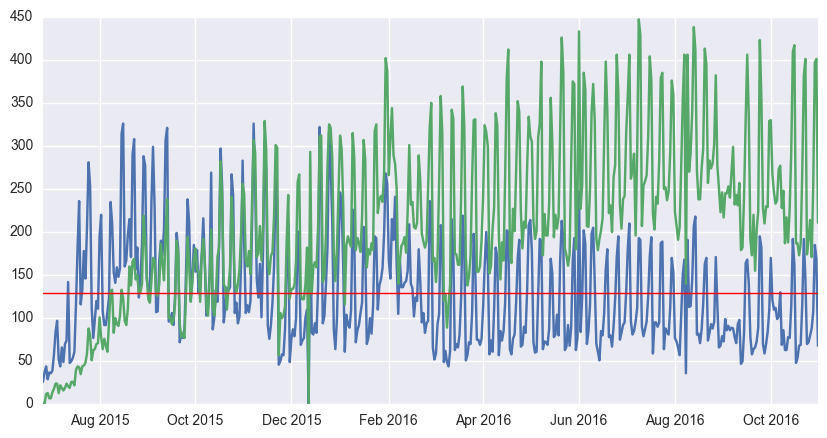

In [35]:
f, (ax) = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(temp_df.index, temp_df['new'])
ax.plot(temp_df.index, temp_df['old'])
info = shop_infos.ix[shop_id]
plt.title(info.cate_1_name + ' ' + info.cate_2_name + ('' if info.cate_3_name is None else info.cate_3_name), fontproperties=myfont)
mean_value = np.mean(temp_df['new'])
print('mean_value=' + str(mean_value))
ax.axhline(y=mean_value, linewidth=1, color='r')
plt.show()